In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

In [ ]:
# Visualization Libraries
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [ ]:
# Text Handling Libraries
import re
from sklearn.feature_extraction.text import CountVectorizer  # Corrected import statement
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
# Load the dataset
df = pd.read_csv('BigBasket Products.csv')

In [ ]:
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [ ]:
print('Null Data Count In Each Column')
print('-' * 30)
print(df.isnull().sum())
print('-' * 30)
print('Null Data % In Each Column')
print('-' * 30)
for col in df.columns:
    null_count = df[col].isnull().sum()
    total_count = df.shape[0]
    print("{} : {: .2f}".format(col,null_count / total_count * 100))

Null Data Count In Each Column
------------------------------
index              0
product            0
category           1
sub_category       1
brand              2
sale_price         1
market_price       1
type               1
rating          3254
description       44
dtype: int64
------------------------------
Null Data % In Each Column
------------------------------
index :  0.00
product :  0.00
category :  0.01
sub_category :  0.01
brand :  0.02
sale_price :  0.01
market_price :  0.01
type :  0.01
rating :  31.47
description :  0.43


In [ ]:
df = df.dropna()
print(df.shape)

(7051, 10)


In [ ]:
df.dtypes

index             int64
product          object
category         object
sub_category     object
brand            object
sale_price      float64
market_price    float64
type             object
rating          float64
description      object
dtype: object

In [ ]:
counts = df['category'].value_counts()
count_percentage = df['category'].value_counts(1) * 100
counts_df = pd.DataFrame({'category': counts.index, 'Counts': counts.values, 'Percent': np.round(count_percentage.values, 2)})
display(counts_df)
px.bar(data_frame = counts_df,
 x='category',
 y='Counts',
 color='Counts',
 color_continuous_scale = 'blues',
 text_auto = True,
 title=f'Count of Items in Each Category')

,category,Counts,Percent
0,Beauty & Hygiene,2028,28.76
1,"Kitchen, Garden & Pets",940,13.33
2,Snacks & Branded Foods,924,13.10
3,Gourmet & World Food,887,12.58
4,"Foodgrains, Oil & Masala",862,12.23
5,Cleaning & Household,773,10.96
6,"Bakery, Cakes & Dairy",231,3.28
7,Beverages,214,3.04
8,Baby Care,192,2.72


In [ ]:
counts = df['sub_category'].value_counts()
count_percentage = df['sub_category'].value_counts(1) * 100
counts_df = pd.DataFrame({'sub_category': counts.index, 'Counts': counts.values, 'Percent': np.round(count_percentage.values, 2)})
print('unique sub_category values',df['sub_category'].nunique())
print('Top 10 sub_category')

display(counts_df.head(10))
print('Bottom 10 sub_category')

display(counts_df.tail(10))
px.bar(data_frame = counts_df[: 10],
 x = 'sub_category',
 y = 'Counts',
 color = 'Counts',
 color_continuous_scale = 'blues',
 text_auto = True,
 title = f'Top 10 Bought Sub_Categories')

px.bar(data_frame = counts_df[-10:],
 x = 'sub_category',
 y = 'Counts',
 color = 'Counts',
 color_continuous_scale = 'blues',
 text_auto = True,
 title = f'Bottom 10 Bought Sub_Categories')

unique sub_category values 76
Top 10 sub_category


,sub_category,Counts,Percent
0,Skin Care,620,8.79
1,Bath & Hand Wash,326,4.62
2,Masalas & Spices,308,4.37
3,Hair Care,293,4.16
4,Storage & Accessories,253,3.59
5,Men's Grooming,250,3.55
6,Crockery & Cutlery,228,3.23
7,Organic Staples,219,3.11
8,Ready To Cook & Eat,214,3.04
9,Fragrances & Deos,210,2.98


Bottom 10 sub_category


,sub_category,Counts,Percent
66,Ice Creams & Desserts,15,0.21
67,Non Dairy,14,0.20
68,Gardening,13,0.18
69,Bakery Snacks,12,0.17
70,Makeup,11,0.16
71,Mothers & Maternity,11,0.16
72,Bakeware,10,0.14
73,Baby Accessories,8,0.11
74,Gourmet Breads,4,0.06
75,Water,3,0.04


In [ ]:
column = 'brand'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1) * 100
counts_df = pd.DataFrame({column: counts.index, 'Counts': counts.values, 'Percent': np.round(count_percentage.values, 2)})
print('unique '+str(column)+' values', df['brand'].nunique())
print('Top 10 '+str(column))

display(counts_df.head(10))
print('Bottom 10 '+str(column))
display(counts_df.tail(10))
px.bar(data_frame = counts_df.head(10),
 x = column,
 y = 'Counts',
 color = 'Counts',
 color_continuous_scale = 'blues',
 text_auto = True,
 title = f'Top 10 Brand Items based on Item Counts')

unique brand values 1435
Top 10 brand


,brand,Counts,Percent
0,bb Royal,100,1.42
1,BB Home,70,0.99
2,Amul,60,0.85
3,Himalaya,55,0.78
4,Cello,44,0.62
5,Organic Tattva,42,0.60
6,Keya,40,0.57
7,INATUR,40,0.57
8,MTR,38,0.54
9,DP,37,0.52


Bottom 10 brand


,brand,Counts,Percent
1425,Tata Tea Kanan Devan,1,0.01
1426,Tommy Hilfiger,1,0.01
1427,Miss Claire,1,0.01
1428,Olitalia,1,0.01
1429,Abzorb-It,1,0.01
1430,Raja,1,0.01
1431,Giffy,1,0.01
1432,Pure,1,0.01
1433,Paaka,1,0.01
1434,Diabetics Dezire,1,0.01


In [ ]:
column = 'type'
counts = df[column].value_counts()
count_percentage = df[column].value_counts(1) * 100
counts_df = pd.DataFrame({column: counts.index, 'Counts': counts.values, 'Percent': np.round(count_percentage.values, 2)})
print('unique '+str(column)+' values', df[column].nunique())
print('Top 10 '+str(column))
display(counts_df.head(10))
counts_df[counts_df['Counts'] == 1].shape
px.bar(data_frame = counts_df.head(10),
 x = 'type',
 y = 'Counts',
 color = 'Counts',
 color_continuous_scale = 'blues',
 text_auto = True,
 title=f'Top 10 Types of Products based on Item Counts')

unique type values 339
Top 10 type


,type,Counts,Percent
0,Face Care,414,5.87
1,Shampoo & Conditioner,155,2.20
2,Blended Masalas,151,2.14
3,Men's Deodorants,148,2.10
4,Bathing Bars & Soaps,143,2.03
5,Containers Sets,124,1.76
6,Body Care,100,1.42
7,Glassware,96,1.36
8,Namkeen & Savoury Snacks,86,1.22
9,Hand Wash & Sanitizers,86,1.22


count    7051.000000
mean        3.942632
std         0.733839
min         1.000000
25%         3.700000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64


<Axes: >

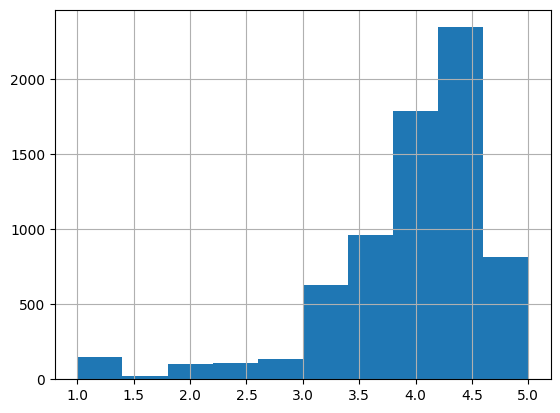

In [ ]:
print(df['rating'].describe())
df['rating'].hist(bins = 10)

In [ ]:
pd.cut(df.rating, bins = [0, 1, 2, 3, 4, 5]).reset_index().groupby(['rating']).size()

rating
(0, 1]     142
(1, 2]     125
(2, 3]     496
(3, 4]    2485
(4, 5]    3803
dtype: int64

In [ ]:
df['discount'] = (df['market_price'] - df['sale_price']) * 100 / df['market_price']
print(df['discount'].describe())
pd.cut(df.discount,bins = [-1, 0, 10, 20, 30, 40, 50, 60, 80, 90, 100]).reset_index().groupby(['discount']).size()

count    7051.000000
mean       11.741710
std        14.540386
min         0.000000
25%         0.000000
50%         5.000000
75%        20.000000
max        78.696742
Name: discount, dtype: float64


discount
(-1, 0]      3049
(0, 10]      1179
(10, 20]     1106
(20, 30]      910
(30, 40]      425
(40, 50]      254
(50, 60]       88
(60, 80]       40
(80, 90]        0
(90, 100]       0
dtype: int64

<Axes: >

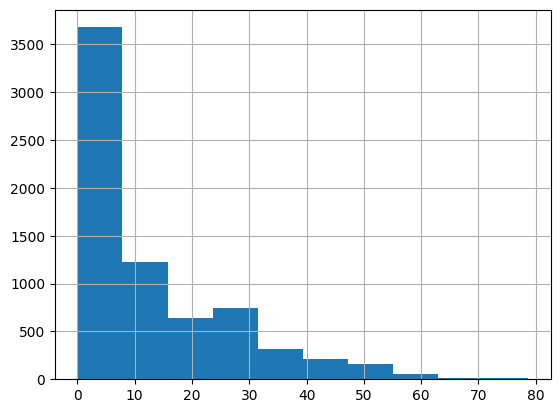

In [ ]:
df['discount'].hist()

In [ ]:
df2 = df.copy()
rmv_spc = lambda a: a.strip()
get_list = lambda a: list(map(rmv_spc, re.split('& |, |\*|\n', a)))  # Corrected regular expression pattern
for col in ['category', 'sub_category', 'type']:
    df2[col] = df2[col].apply(get_list)

def cleaner(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

for col in ['category', 'sub_category', 'type', 'brand']:
    df2[col] = df2[col].apply(cleaner)

def couple(x):
    return ' '.join(x['category']) + ' ' + ' '.join(x['sub_category']) + ' ' + x['brand'] + ' ' + ' '.join(x['type'])

df2['product_classification_features'] = df2.apply(couple, axis=1)


In [ ]:
# Define the recommend_most_popular function
def recommend_most_popular(col, col_value):
    # Implement the logic for recommending the most popular items based on the given column and value
    recommend_most_popular(col = 'category', col_value = 'Beauty & Hygiene')
    recommend_most_popular(col = 'sub_category', col_value = 'Hair Care')
    pass

*Cotent Based Model*

In [ ]:
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [ ]:
# Define your text strings
s1 = "This is the first sentence."
s2 = "This is the second sentence."
s3 = "This is the third sentence."

In [ ]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(lowercase = True)

In [ ]:
# Transform the text strings into a matrix of token counts
X = vectorizer.fit_transform([s1, s2, s3])
X.toarray()

array([[1, 1, 0, 1, 1, 0, 1],
       [0, 1, 1, 1, 1, 0, 1],
       [0, 1, 0, 1, 1, 1, 1]])

In [ ]:
# Create a DataFrame from the token counts matrix
count_vect_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [ ]:
distance.cdist(count_vect_df, count_vect_df, metric = 'euclidean').round(2)

array([[0.  , 1.41, 1.41],
       [1.41, 0.  , 1.41],
       [1.41, 1.41, 0.  ]])

In [ ]:
distance.cdist(count_vect_df, count_vect_df, metric = 'cityblock').astype('int')

array([[0, 2, 2],
       [2, 0, 2],
       [2, 2, 0]])

In [ ]:
distance.cdist(count_vect_df, count_vect_df, metric = 'jaccard').astype('int')

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
count = CountVectorizer(stop_words = 'english')
count_matrix = count.fit_transform(df2['product_classification_features'])
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim_df = pd.DataFrame(cosine_sim)

In [ ]:
def content_recommendation_v1(title):
    a = df2.copy().reset_index().drop('index', axis = 1)
    index = a[a['product'] == title].index[0]
    top_n_index = list(cosine_sim_df[index].nlargest(10).index)
    try:
        top_n_index.remove(index)
    except:
        pass
    similar_df = a.iloc[top_n_index][['product']]
    similar_df['cosine_similarity'] = cosine_sim_df[index].iloc[top_n_index]
    return similar_df

In [ ]:
title = 'Water Bottle - Orange'
content_recommendation_v1(title)

,product,cosine_similarity
109,Glass Water Bottle - Aquaria Organic Purple,0.875
705,Glass Water Bottle With Round Base - Transpare...,0.875
1155,H2O Unbreakable Water Bottle - Pink,0.875
1500,Water Bottle H2O Purple,0.875
1828,H2O Unbreakable Water Bottle - Green,0.875
1976,Regel Tritan Plastic Sports Water Bottle - Black,0.875
2182,Apsara 1 Water Bottle - Assorted Colour,0.875
2361,"Glass Water Bottle With Round Base - Yellow, B...",0.875
2485,Trendy Stainless Steel Bottle With Steel Cap -...,0.875


In [ ]:
title = 'Dark Chocolate- 55% Rich In Cocoa'
content_recommendation_v1(title)

,product,cosine_similarity
105,I Love You Fruit N Nut Chocolate,1.0
1144,Choco Cracker - Magical Crystal With Milk Choc...,1.0
1718,"Dark Chocolate - Single Origin, India",1.0
2517,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",1.0
3117,"Colombia Classique Black, Single Origin Dark C...",1.0
3167,Dark Chocolate,1.0
4013,Almondo - Roasted Almonds Coated With Milk Cho...,1.0
4358,Sugar Free Dark Chocolate,1.0
5867,Milk Compound Slab - MCO-11,1.0


In [ ]:
count2 = CountVectorizer(stop_words = 'english',lowercase = True)
count_matrix2 = count2.fit_transform(df2['product'])
cosine_sim2 = cosine_similarity(count_matrix2, count_matrix2)
cosine_sim_df2 = pd.DataFrame(cosine_sim2)

In [ ]:
def content_recommendation_v2(title):
    a = df2.copy().reset_index().drop('index',axis = 1)
    index = a[a['product'] == title].index[0]
    similar_basis_metric_1 = cosine_sim_df[cosine_sim_df[index] > 0][index].reset_index().rename(columns = {index: 'sim_1'})
    similar_basis_metric_2 = cosine_sim_df2[cosine_sim_df2[index] > 0][index].reset_index().rename(columns = {index: 'sim_2'})
    similar_df = similar_basis_metric_1.merge(similar_basis_metric_2, how = 'left').merge(a[['product']].reset_index(),how = 'left')
    similar_df['sim'] = similar_df[['sim_1', 'sim_2']].fillna(0).mean(axis = 1)
    similar_df = similar_df[similar_df['index'] != index].sort_values(by = 'sim',ascending = False)
    return similar_df[['product','sim']].head(10)

In [ ]:
title = 'Water Bottle - Orange'
content_recommendation_v2(title)

,product,sim
669,Sante Infuser Water Bottle - Orange,0.824798
195,Water Bottle H2O Purple,0.726175
906,Sunshine Insulated Water Bottle - Green,0.695699
850,Sante Infuser Water Bottle - Yellow,0.695699
432,Solar Pet water Bottle - Green,0.695699
817,Star Pet water Bottle - Amber,0.695699
247,H2O Unbreakable Water Bottle - Green,0.695699
482,Sunshine Insulated Water Bottle - Yellow,0.695699
305,Apsara 1 Water Bottle - Assorted Colour,0.695699
154,H2O Unbreakable Water Bottle - Pink,0.695699


In [ ]:
title = 'Dark Chocolate- 55% Rich In Cocoa'
content_recommendation_v2(title)

,product,sim
437,"Fruit N Nut, Dark Chocolate- 55% Rich In Cocoa",0.922577
561,Dark Chocolate,0.816228
504,Dlite Rich Cocoa Dark Chocolate Bar,0.802648
548,"Colombia Classique Black, Single Origin Dark C...",0.769680
914,Rich Cocoa,0.753728
777,Sugar Free Dark Chocolate,0.723607
307,"Dark Chocolate - Single Origin, India",0.700000
1222,Prebiotic Chocolate - Dark Chocolate,0.686340
785,Prebiotic Chocolate - Dark Chocolate Ginger,0.666025
909,Dark Milk Chocolate Bar,0.661107


In [ ]:
title = 'Nacho Round Chips'
content_recommendation_v2(title)

,product,sim
1680,Nacho Chips - Salsa,0.770833
718,Nacho Chips - Jalapeno,0.770833
464,Nacho Chips - Peri Peri,0.735702
86,"Nacho Chips - Cheese With Herbs, No Onion, No ...",0.673202
1233,Nacho Chips - Peri Peri,0.673202
930,Nacho Crisps - Barbeque,0.604167
1298,Naan Chips - Chatpata Pudina,0.581838
1605,Naan Chips - Chatpata Pudina,0.581838
397,"Chips - Pita, Parmesan And Mediterranean",0.581838
813,Salsa Sweet Potato Chips,0.581838
